## Feature Selection
#### Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

## Variance Threshold
________
#### Variance threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold as it is assumed that features with a higher variance may contain more useful information. 
#### Here it is used as a feature selector that removes all low-variance features.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/Image-6-1.png)

#### Features having variance lower than or equal to the threshold value will be returned as 'False' (in the array returned by .get_support()) and will be dropped. 
#### After dropping these features  we check the accuracy of the new dataset and compare it with original.
#### For choosing the threshold values, I experimented with different numbers and chose the suitable ones.

__________

### Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te


from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]
    

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def acc_score_thr(df,label,thr_list):
    Score = pd.DataFrame({"Classifier":classifiers})
    for k in range(len(thr_list)):
        df2 = variance_threshold(df,thr_list[k])
        X_train,X_test,Y_train,Y_test = split(df2,label)
        j = 0
        acc = []
        for i in models:
            model = i
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            acc.append(accuracy_score(Y_test,predictions))
            j = j+1  
        feat = str(thr_list[k])
        Score[feat] = acc
    return Score

        
def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c )
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
        

def highlight_max(data, color='aquamarine'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

_______
### Function Description
#### 1. split():
Splits the dataset into training and test set.
#### 2. variance_threshold():
Returns the dataframe after dropping features with lower variance than the threshold value.
#### 3. acc_score():
Returns accuracy for all the classifiers.
#### 4. acc_score_thr():
Returns accuracy for all the classifiers for the respective threshold value.
#### 5. plot2():
For plotting the results.
___________
### The following 3 datasets are used:
1. Breast Cancer
2. Parkinson's Disease
3. PCOS
________
### Plan of action:
* Looking at dataset (includes a little preprocessing)
* Checking Accuracy (comparing accuracies with the new dataset)
* Visualization (Plotting the graphs)
_______

______________
# Breast Cancer
_____________

### 1. Looking at dataset

In [2]:
data_bc = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [3]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All the features in this dataset have continuous values


### 2. Checking Accuracy

In [4]:
score1 = acc_score(data_bc,label_bc)
score1

,Classifier,Accuracy
0,RandomForest,0.972028
1,Logistic,0.965035
2,KNeighbors,0.965035
3,LinearSVM,0.958042
4,GradientBoosting,0.958042
5,RadialSVM,0.951049
6,AdaBoost,0.951049
7,DecisionTree,0.930070


In [5]:
threshold_bc = [0.04,0.02,0.01,0.008,0.004,0.001]
classifiers = score1["Classifier"].tolist()
score_bc = acc_score_thr(data_bc,label_bc,threshold_bc)
score_bc.style.apply(highlight_max, subset = score_bc.columns[1:], axis=None)

,Classifier,0.04,0.02,0.01,0.008,0.004,0.001
0,RandomForest,0.965035,0.965035,0.965035,0.965035,0.972028,0.965035
1,Logistic,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049
2,KNeighbors,0.965035,0.972028,0.972028,0.972028,0.965035,0.958042
3,LinearSVM,0.979021,0.979021,0.979021,0.979021,0.965035,0.972028
4,GradientBoosting,0.958042,0.958042,0.958042,0.958042,0.951049,0.951049
5,RadialSVM,0.951049,0.951049,0.951049,0.951049,0.923077,0.937063
6,AdaBoost,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035
7,DecisionTree,0.972028,0.965035,0.965035,0.965035,0.958042,0.958042


#### Best Accuracy with all features : RandomForest Classifier - 0.972
#### Best Accuracy after applying with VarianceThreshold() : LinearSVM - for threshold = (0.04,0.02,0.01,0.008) - 0.979
#### Here we can only see a slight improvement.

### 3. Visualization

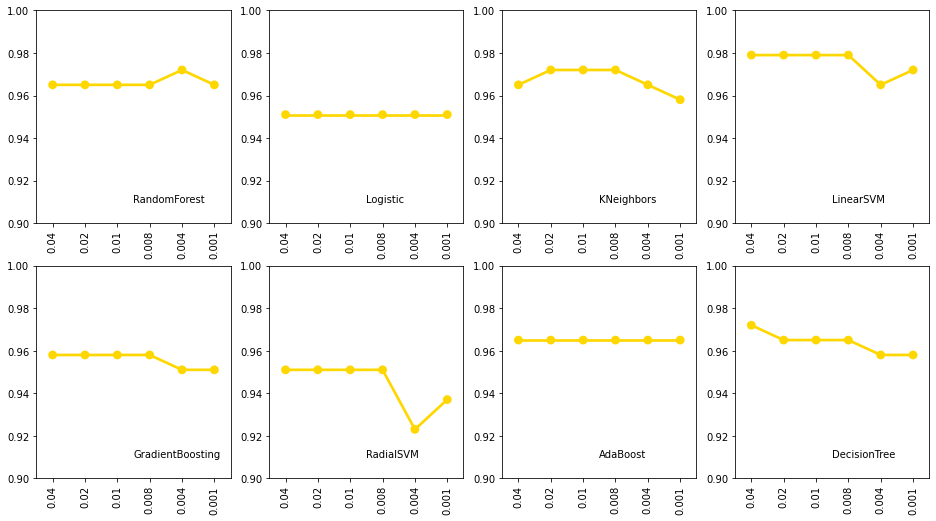

In [6]:
plot2(score_bc,0.90,1,2.5,0.91,c = "gold")

______
# Parkinson's disease
_______

### 1. Looking at dataset

In [7]:
data_pd = pd.read_csv("../input/parkinson-disease-detection/Parkinsson disease.csv")
label_pd = data_pd["status"]
data_pd.drop(["status","name"],axis = 1,inplace = True)

print("Parkinson's disease dataset:\n",data_pd.shape[0],"Records\n",data_pd.shape[1],"Features")

Parkinson's disease dataset:
 195 Records
 22 Features


In [8]:
display(data_pd.head())
print("All the features in this dataset have continuous values")

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


All the features in this dataset have continuous values


### 2. Checking Accuracy

In [9]:
score3 = acc_score(data_pd,label_pd)
score3

,Classifier,Accuracy
0,LinearSVM,0.918367
1,KNeighbors,0.897959
2,DecisionTree,0.897959
3,RandomForest,0.877551
4,RadialSVM,0.877551
5,GradientBoosting,0.857143
6,Logistic,0.836735
7,AdaBoost,0.836735


In [10]:
threshold_pd = [0.05,0.01,0.005,0.001,0.0001,0.0005]
classifiers = score3["Classifier"].tolist()
score_pd = acc_score_thr(data_pd,label_pd,threshold_pd)
score_pd.style.apply(highlight_max, subset = score_pd.columns[1:], axis=None)

,Classifier,0.05,0.01,0.005,0.001,0.0001,0.0005
0,LinearSVM,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551
1,KNeighbors,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735
2,DecisionTree,0.897959,0.897959,0.897959,0.897959,0.897959,0.897959
3,RandomForest,0.897959,0.877551,0.938776,0.918367,0.938776,0.938776
4,RadialSVM,0.857143,0.857143,0.857143,0.857143,0.877551,0.877551
5,GradientBoosting,0.897959,0.897959,0.836735,0.877551,0.857143,0.938776
6,Logistic,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735
7,AdaBoost,0.857143,0.877551,0.877551,0.918367,0.918367,0.918367


#### Best Accuracy with all features : RandomForest Classifier - 0.918
#### Best Accuracy after applying with VarianceThreshold() : RandomForest Classifier - for threshold = (0.005,0.0001,0.0005) - 0.938 and LiearSVM - for threshold = (0.0005) - 0.938
#### Here we can see an improvement of 2%.

### 3. Visualization

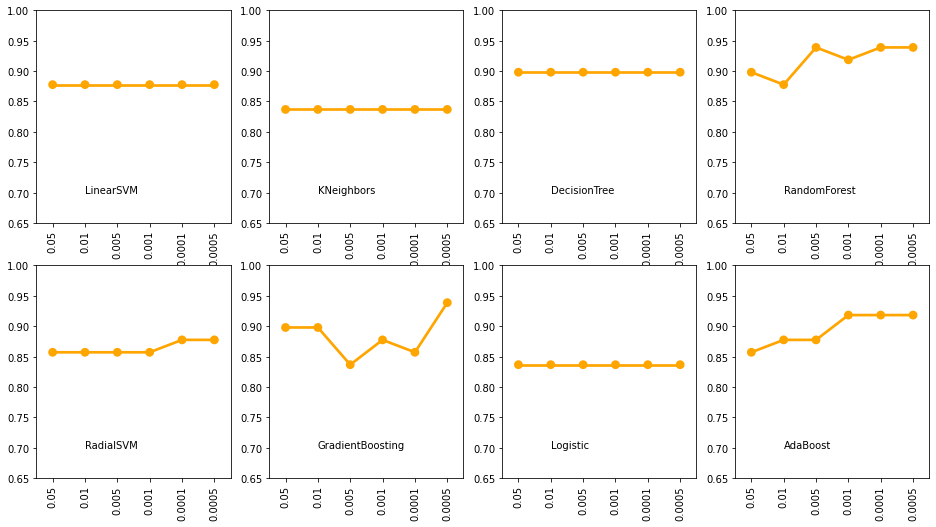

In [11]:
plot2(score_pd,0.65,1.0,1,0.7,c = "orange")

________
# PCOS
________

### 1. Looking at dataset

In [12]:
data_pcos = pd.read_csv("../input/pcos-dataset/PCOS_data.csv")
label_pcos = data_pcos["PCOS (Y/N)"]
data_pcos.drop(["Sl. No","Patient File No.","PCOS (Y/N)","Unnamed: 44","II    beta-HCG(mIU/mL)","AMH(ng/mL)"],axis = 1,inplace = True)
data_pcos["Marraige Status (Yrs)"].fillna(data_pcos['Marraige Status (Yrs)'].describe().loc[['50%']][0], inplace = True) 
data_pcos["Fast food (Y/N)"].fillna(1, inplace = True) 

print("PCOS dataset:\n",data_pcos.shape[0],"Records\n",data_pcos.shape[1],"Features")

PCOS dataset:
 541 Records
 39 Features


In [13]:
display(data_pcos.head())
print("The features in this dataset have both discrete and continuous values")

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


The features in this dataset have both discrete and continuous values


### 2. Checking Accuracy

In [14]:
score4 = acc_score(data_pcos,label_pcos)
score4

,Classifier,Accuracy
0,RandomForest,0.889706
1,RadialSVM,0.860294
2,AdaBoost,0.860294
3,LinearSVM,0.852941
4,DecisionTree,0.845588
5,GradientBoosting,0.838235
6,KNeighbors,0.698529
7,Logistic,0.676471


In [15]:
threshold_pcos = [0.17,0.19,0.21,0.23,0.5,0.8]
classifiers = score4["Classifier"].tolist()
score_pcos = acc_score_thr(data_pcos,label_pcos,threshold_pcos)
score_pcos.style.apply(highlight_max, subset = score_pcos.columns[1:], axis=None)

,Classifier,0.17,0.19,0.21,0.23,0.5,0.8
0,RandomForest,0.852941,0.860294,0.860294,0.860294,0.816176,0.816176
1,RadialSVM,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529
2,AdaBoost,0.845588,0.852941,0.838235,0.838235,0.823529,0.808824
3,LinearSVM,0.875000,0.897059,0.867647,0.889706,0.838235,0.845588
4,DecisionTree,0.875000,0.875000,0.852941,0.860294,0.779412,0.779412
5,GradientBoosting,0.838235,0.852941,0.808824,0.801471,0.779412,0.757353
6,KNeighbors,0.676471,0.676471,0.676471,0.676471,0.676471,0.676471
7,Logistic,0.875000,0.867647,0.867647,0.860294,0.823529,0.838235


#### Best Accuracy with all features : RandomForest Classifier - 0.889
#### Best Accuracy after applying with VarianceThreshold() : DecisionTree Classifier - for threshold = (0.19) - 0.897
#### Here we can see an improvement of ~1%.

### 3. Visualization

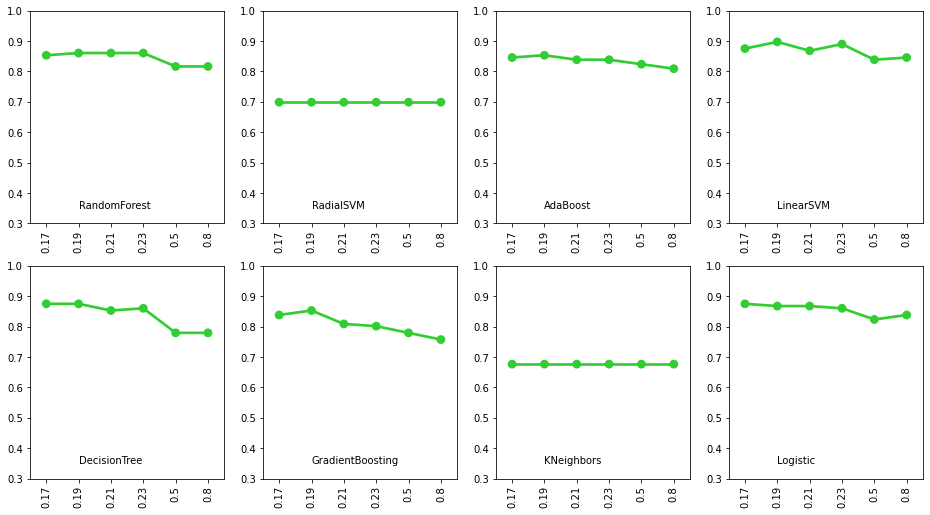

In [16]:
plot2(score_pcos,0.3,1.0,1,0.35,c = "limegreen")

________

#### From looking at these results we can see that there is a possibility of slight improvement in the accuracy after removing certain features with low variance.
#### Link to other feature selection methods:
##### [Genetic Algorithm](https://www.kaggle.com/tanmayunhale/genetic-algorithm-for-feature-selection)
##### [Pearson Correlation](https://www.kaggle.com/tanmayunhale/feature-selection-pearson-correlation)
##### [F-score](https://www.kaggle.com/tanmayunhale/feature-selection-f-score)
